In [16]:
import pandas as pd

df = pd.read_excel("data/dados_cerveja_nota.xlsx")

df["aprovado"] = (df["nota"] > 5).astype(int)

df.head()

,id,cerveja,nota,aprovado
0,1,1,0.75,0
1,2,1,3.00,0
2,3,2,1.75,0
3,4,3,1.75,0
4,5,4,4.20,0


In [40]:
# making de machine learn

from sklearn import linear_model
from sklearn import tree
from sklearn import naive_bayes

reg = linear_model.LogisticRegression(penalty=None,
                                      fit_intercept=True)
reg.fit(df[["cerveja"]], df["aprovado"])
reg_predict = reg.predict(df[["cerveja"]].drop_duplicates())
reg_proba = reg.predict_proba(df[["cerveja"]].drop_duplicates())[:,1]

arvore_full = tree.DecisionTreeClassifier(random_state=42)
arvore_full.fit(df[["cerveja"]], df["aprovado"])
arvore_full_pred = arvore_full.predict(df[["cerveja"]].drop_duplicates())
arvore_full_prob = arvore_full.predict_proba(df[["cerveja"]].drop_duplicates())[:,1]

arvore_d2 = tree.DecisionTreeClassifier(random_state=42, max_depth=2)
arvore_d2.fit(df[["cerveja"]], df["aprovado"])
arvore_d2_pred = arvore_d2.predict(df[["cerveja"]].drop_duplicates())
arvore_d2_prob = arvore_d2.predict_proba(df[["cerveja"]].drop_duplicates())[:,1]

nb = naive_bayes.GaussianNB()
nb.fit(df[["cerveja"]], df["aprovado"])
nb_pred = nb.predict(df[["cerveja"]].drop_duplicates())
nb_prob = nb.predict_proba(df[["cerveja"]].drop_duplicates())[:,1]

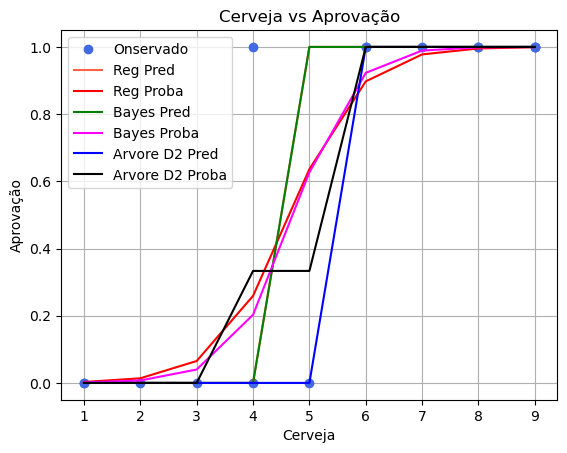

In [43]:
import matplotlib.pyplot as plt

plt.plot(df["cerveja"], df["aprovado"], "o", color="royalblue")
plt.grid(True)
plt.title("Cerveja vs Aprovação")
plt.xlabel("Cerveja")
plt.ylabel("Aprovação")
plt.plot(df["cerveja"].drop_duplicates(), reg_predict, color="tomato")
plt.plot(df["cerveja"].drop_duplicates(), reg_proba, color="red")
plt.plot(df["cerveja"].drop_duplicates(), nb_pred, color="green")
plt.plot(df["cerveja"].drop_duplicates(), nb_prob, color="magenta")
plt.plot(df["cerveja"].drop_duplicates(), arvore_d2_pred, color="blue")
plt.plot(df["cerveja"].drop_duplicates(), arvore_d2_prob, color="black")
plt.legend([
    "Onservado",
    "Reg Pred",
    "Reg Proba",
    "Bayes Pred",
    "Bayes Proba",
    "Arvore D2 Pred",
    "Arvore D2 Proba"
]
)